#Tendencias de uso de energías sostenibles por país 
- ¿Cuáles son las tipos de energías que hay y qué países las ocupan?
- Top 10 países y que energías que se ocupan 
- Relación de acceso de electricidad VS GDP
- Acceso a la electricidad vs población
- Predicción de uso de energía sostenible
- Categorize regions for infrastructure development, understand sustainable energy's role.

#Emisión de CO2 por país BRICSM vs G7
- Porcentaje para cocinar de países
- Forecast CO2 emissions, support climate strategies.
- Evaluate policy impact de CO2 
- Uso de energía fósil vs GDP
- Precio de energía eléctrica en el país


#Países que ocupan energía nuclear vs energia solar
- Analyze access, density, and growth for equitable distribution.
- Guide investors towards sustainable opportunities.
- Eficiencia de cada país de energia nuclear vs energia solar
- Consumo per cápita de electricidad nuclear vs población
- Consumo per cápita de electricidad solar vs población

#Ranking (top 5) de países de energía sostenible vs PIB per cápita
- Identify intensive areas for environmental impact reduction
- Identify regions for green investments based on capacity
- Consumo de electricidad vs crecimiento de PIB
- Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours
- Electricity generated from nuclear power in terawatt-hours

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [3]:
csv_reader='global-data-on-sustainable-energy (1).csv'
global_data=pd.read_csv(csv_reader)
global_df=pd.DataFrame(global_data)
global_df.dropna()
global_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [4]:
russia_count = len(global_df[global_df['Entity'] == 'Russia'])

print("Number of times Russia appears in the 'Entity' column:", russia_count)

Number of times Russia appears in the 'Entity' column: 0


In [5]:
#Prints unique Entities for identiffication and further analysis.

unique_entities = global_df['Entity'].unique().tolist()
print(unique_entities)


['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhsta

In [6]:
#Filter for G7 and BRICS countries.
#The purpose of these 2 groups is to compare and contrast the two major groups and its sphere of I1nfluence. 

# List of entities to filter
entities_to_use = [
    "United Kingdom",
    "United States",
    "Canada",
    "Japan",
    "France",
    "Germany",
    "Italy",
    "Brazil",
    "Russia",
    "India",
    "China",
    "South Africa"
]

# Filter the DataFrame for the specified entities
filtered_global_df = global_df[global_df['Entity'].isin(entities_to_use)]


filtered_global_df





,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
483,Brazil,2000,94.391716,89.0,364.68,126500000.0,42.66,28.87,4.94,308.77,...,13400.320,3.88,3.136700e+05,43.288433,4.387949,3749.910848,25,8515770.0,-14.235004,-51.925280
484,Brazil,2001,96.016525,89.7,367.36,5290000.0,41.33,35.19,14.27,273.71,...,12893.828,3.90,3.193800e+05,39.111620,1.389896,3160.249345,25,8515770.0,-14.235004,-51.925280
485,Brazil,2002,96.652990,90.1,374.10,33350000.0,42.85,33.50,13.84,292.95,...,13021.791,3.89,3.177600e+05,40.756653,3.053462,2839.491501,25,8515770.0,-14.235004,-51.925280
486,Brazil,2003,96.980095,90.6,387.32,7530000.0,45.11,31.62,13.40,313.88,...,13111.923,3.91,3.108100e+05,42.284126,1.140829,3070.436419,25,8515770.0,-14.235004,-51.925280
487,Brazil,2004,96.765110,91.1,392.57,1140000.0,45.18,40.14,11.60,329.43,...,13593.700,3.90,3.285200e+05,42.286156,5.759965,3637.313890,25,8515770.0,-14.235004,-51.925280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,United States,2016,100.000000,100.0,NaN,NaN,9.46,2656.96,805.69,624.91,...,78613.540,4.74,4.894500e+06,8.285086,1.711427,58021.400500,36,9833517.0,37.090240,-95.712891
3519,United States,2017,100.000000,100.0,NaN,NaN,9.92,2540.17,804.95,707.19,...,78289.010,4.62,4.819370e+06,9.082049,2.332679,60109.655730,36,9833517.0,37.090240,-95.712891
3520,United States,2018,100.000000,100.0,NaN,NaN,10.12,2661.30,807.08,733.17,...,80583.340,4.61,4.975310e+06,8.964939,2.996464,63064.418410,36,9833517.0,37.090240,-95.712891
3521,United States,2019,100.000000,100.0,NaN,NaN,10.42,2588.21,809.41,760.76,...,79489.016,4.51,4.817720e+06,9.315263,2.161177,65279.529030,36,9833517.0,37.090240,-95.712891


In [9]:
russia_count = len(BRICS_G7_df[BRICS_G7_df['Entity'] == 'Russia'])

print("Number of times Russia appears in the 'Entity' column:", russia_count)

Number of times Russia appears in the 'Entity' column: 0


In [8]:

# Create a unique dataframe to filter only the countries in either the BRICS or G7 groups.

# Define the BRICS and G7 countries.
BRICS = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
G7 = ['United States', 'United Kingdom', 'France', 'Germany', 'Italy', 'Canada', 'Japan']

# Function to determine if the country is in BRICS or G7.
def categorize_country(entity):
    if entity in BRICS:
        return 'BRICS'
    elif entity in G7:
        return 'G7'
    else:
        return None  # In case there are other entities, though as per your description there shouldn't be.

# Apply the function to the 'Entity' column to create the new 'BRICS/G7' column.
filtered_global_df['BRICS/G7'] = filtered_global_df['Entity'].apply(categorize_country)

# The resulting dataframe is assigned to BRICS_G7_df
BRICS_G7_df = filtered_global_df

# Output the dataframe
BRICS_G7_df


C:\Users\52614\AppData\Local\Temp\ipykernel_3336\3041376010.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_global_df['BRICS/G7'] = filtered_global_df['Entity'].apply(categorize_country)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,BRICS/G7
483,Brazil,2000,94.391716,89.0,364.68,126500000.0,42.66,28.87,4.94,308.77,...,3.88,3.136700e+05,43.288433,4.387949,3749.910848,25,8515770.0,-14.235004,-51.925280,BRICS
484,Brazil,2001,96.016525,89.7,367.36,5290000.0,41.33,35.19,14.27,273.71,...,3.90,3.193800e+05,39.111620,1.389896,3160.249345,25,8515770.0,-14.235004,-51.925280,BRICS
485,Brazil,2002,96.652990,90.1,374.10,33350000.0,42.85,33.50,13.84,292.95,...,3.89,3.177600e+05,40.756653,3.053462,2839.491501,25,8515770.0,-14.235004,-51.925280,BRICS
486,Brazil,2003,96.980095,90.6,387.32,7530000.0,45.11,31.62,13.40,313.88,...,3.91,3.108100e+05,42.284126,1.140829,3070.436419,25,8515770.0,-14.235004,-51.925280,BRICS
487,Brazil,2004,96.765110,91.1,392.57,1140000.0,45.18,40.14,11.60,329.43,...,3.90,3.285200e+05,42.286156,5.759965,3637.313890,25,8515770.0,-14.235004,-51.925280,BRICS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,United States,2016,100.000000,100.0,NaN,NaN,9.46,2656.96,805.69,624.91,...,4.74,4.894500e+06,8.285086,1.711427,58021.400500,36,9833517.0,37.090240,-95.712891,G7
3519,United States,2017,100.000000,100.0,NaN,NaN,9.92,2540.17,804.95,707.19,...,4.62,4.819370e+06,9.082049,2.332679,60109.655730,36,9833517.0,37.090240,-95.712891,G7
3520,United States,2018,100.000000,100.0,NaN,NaN,10.12,2661.30,807.08,733.17,...,4.61,4.975310e+06,8.964939,2.996464,63064.418410,36,9833517.0,37.090240,-95.712891,G7
3521,United States,2019,100.000000,100.0,NaN,NaN,10.42,2588.21,809.41,760.76,...,4.51,4.817720e+06,9.315263,2.161177,65279.529030,36,9833517.0,37.090240,-95.712891,G7


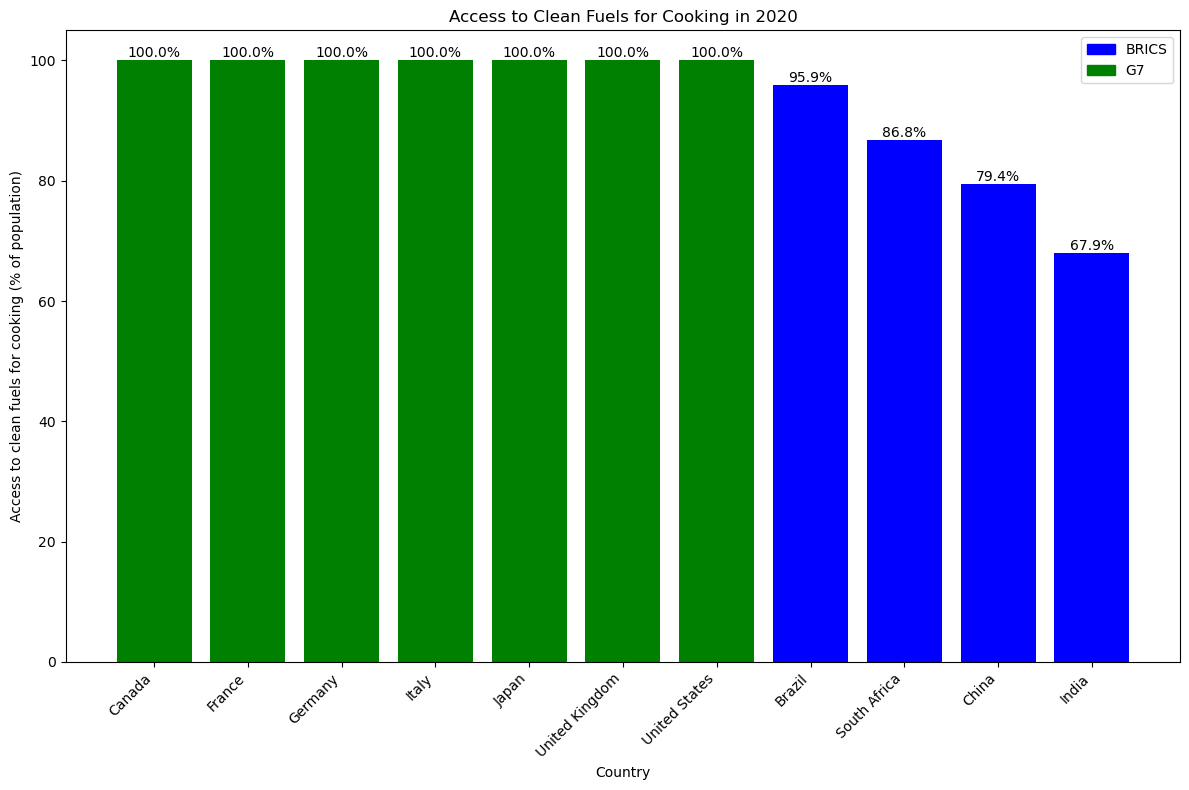

In [10]:
# Introduction

# Access to clean fuels is a good indicator to determine the level of access a particular country has to sustainable methods for food preparation.
# It is natural to assume that more developed and wealthier countries have greater access to clean fuels for food preparation.
# BRICS and G7 countries will be compared in this analysis.



# Filter the DataFrame to include only the latest year (2020)
latest_year_data = BRICS_G7_df[BRICS_G7_df['Year'] == 2020]

# Sort the data by "Access to clean fuels for cooking" in descending order
latest_year_data_sorted = latest_year_data.sort_values(by="Access to clean fuels for cooking", ascending=False)

# Define colors for BRICS and G7 countries
colors_dict = {'BRICS': 'blue', 'G7': 'green'}

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(latest_year_data_sorted['Entity'], latest_year_data_sorted['Access to clean fuels for cooking'],
               color=[colors_dict[group] for group in latest_year_data_sorted['BRICS/G7']])
plt.xlabel('Country')
plt.ylabel('Access to clean fuels for cooking (% of population)')
plt.title('Access to Clean Fuels for Cooking in 2020')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add percentage labels inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Create legend
legend_labels = [plt.Rectangle((0,0),1,1, color=colors_dict[label]) for label in colors_dict]
plt.legend(legend_labels, colors_dict.keys())

plt.tight_layout()
plt.show()

In [ ]:
# As we can see, all G7 countries achieved a perfect score with 100% of the population having access to clean cooking fuels in 2020.
# As for the BRICS countries, they still have some way to go to reach the level of development that G7 countries have.
# Brazil nearly reached a perfect score with 95.9% access, followed by South Africa at 86.8%.


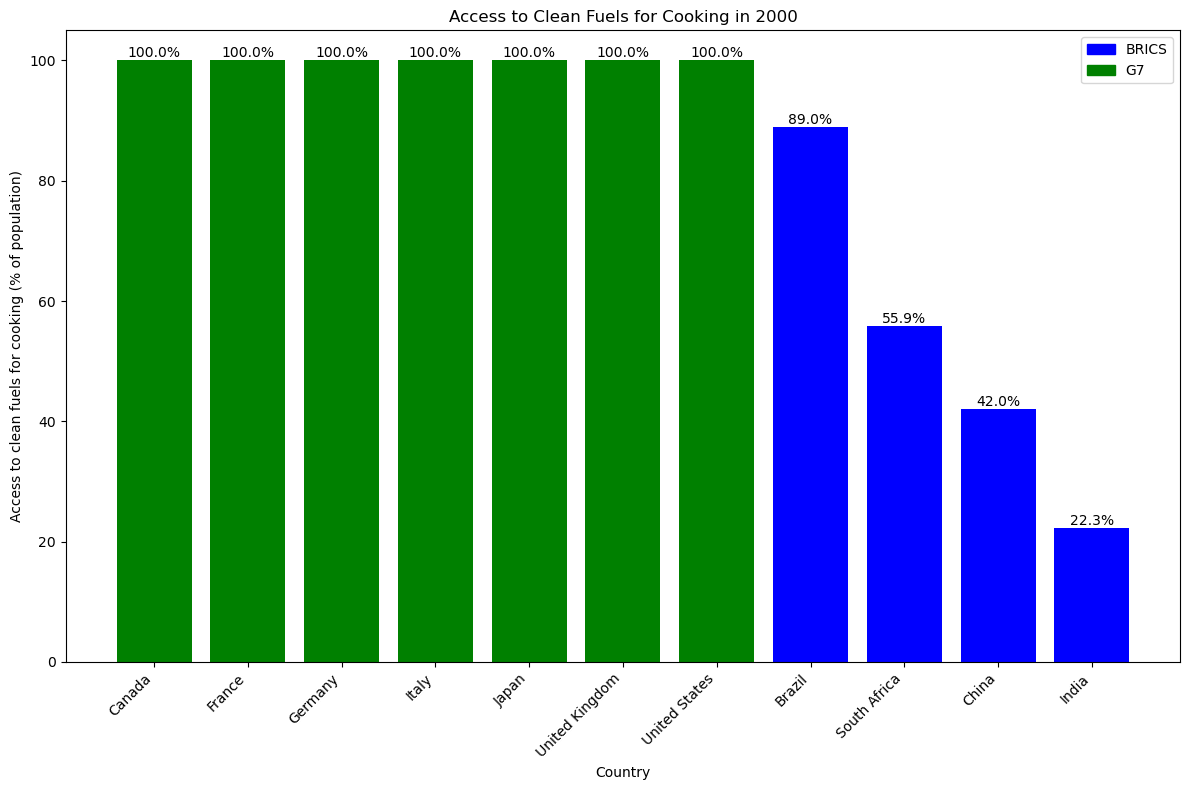

In [11]:
# Filter the DataFrame to include only the latest year (2000)
latest_year_data = BRICS_G7_df[BRICS_G7_df['Year'] == 2000]

# Sort the data by "Access to clean fuels for cooking" in descending order
latest_year_data_sorted = latest_year_data.sort_values(by="Access to clean fuels for cooking", ascending=False)

# Define colors for BRICS and G7 countries
colors_dict = {'BRICS': 'blue', 'G7': 'green'}

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(latest_year_data_sorted['Entity'], latest_year_data_sorted['Access to clean fuels for cooking'],
               color=[colors_dict[group] for group in latest_year_data_sorted['BRICS/G7']])
plt.xlabel('Country')
plt.ylabel('Access to clean fuels for cooking (% of population)')
plt.title('Access to Clean Fuels for Cooking in 2000')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add percentage labels inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Create legend
legend_labels = [plt.Rectangle((0,0),1,1, color=colors_dict[label]) for label in colors_dict]
plt.legend(legend_labels, colors_dict.keys())

plt.tight_layout()
plt.show()

In [ ]:
# Even in the year 2000, G7 countries maintained a perfect 100% population access to clean cooking fuels.
# For BRICS countries, the order of access remained the same from 2000 to 2020. However, significant progress has been made over these 20 years.
# We will explore this progress in the next graph.


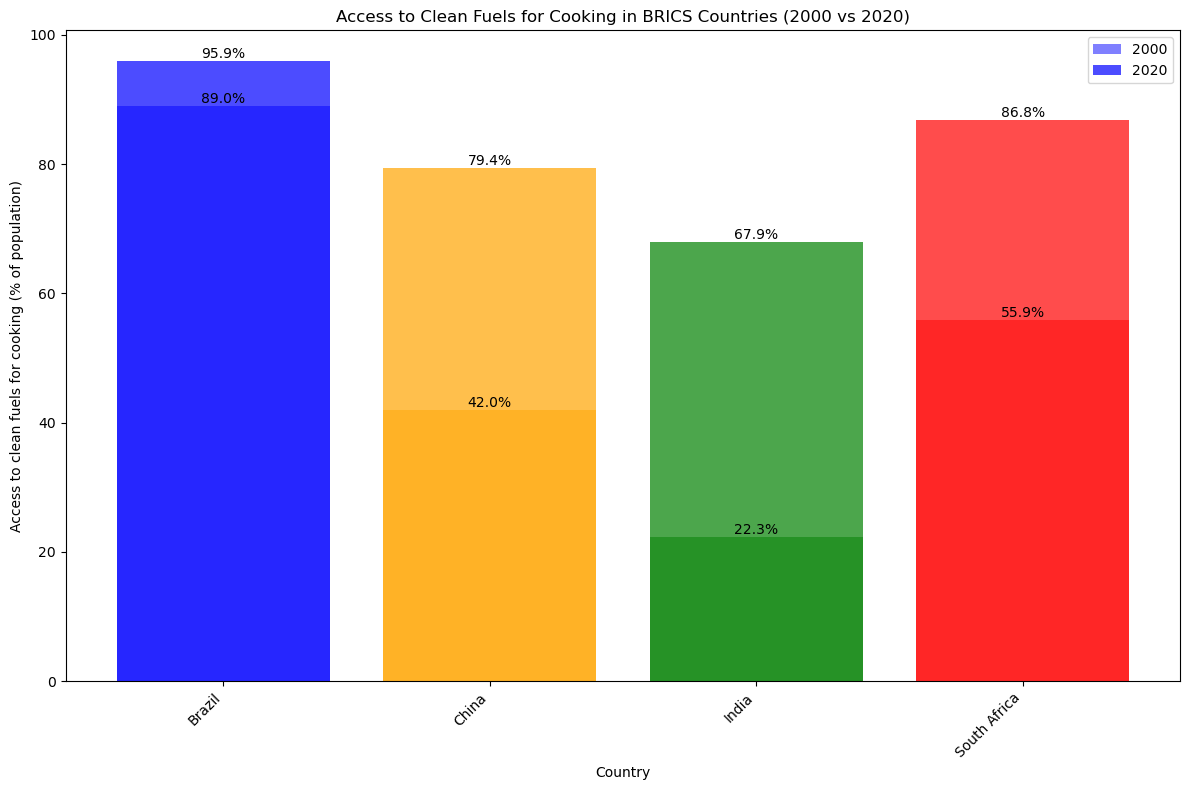

In [12]:
# Filter the DataFrame to include BRICS countries for the years 2000 and 2020
brics_data_2000 = BRICS_G7_df[(BRICS_G7_df['Year'] == 2000) & (BRICS_G7_df['BRICS/G7'] == 'BRICS')]
brics_data_2020 = BRICS_G7_df[(BRICS_G7_df['Year'] == 2020) & (BRICS_G7_df['BRICS/G7'] == 'BRICS')]

# Sort the data by "Entity" for consistency in plotting
brics_data_2000_sorted = brics_data_2000.sort_values(by="Entity")
brics_data_2020_sorted = brics_data_2020.sort_values(by="Entity")

# Define colors for bars
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plotting
plt.figure(figsize=(12, 8))

# Plot bars for 2000
bars_2000 = plt.bar(brics_data_2000_sorted['Entity'], brics_data_2000_sorted['Access to clean fuels for cooking'],
                    color=colors, alpha=0.5, label='2000')

# Plot bars for 2020
bars_2020 = plt.bar(brics_data_2020_sorted['Entity'], brics_data_2020_sorted['Access to clean fuels for cooking'],
                    color=colors, alpha=0.7, label='2020')

plt.xlabel('Country')
plt.ylabel('Access to clean fuels for cooking (% of population)')
plt.title('Access to Clean Fuels for Cooking in BRICS Countries (2000 vs 2020)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add value labels to each bar for 2000
for bar in bars_2000:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

# Add value labels to each bar for 2020
for bar in bars_2020:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Conclusion

# This graph provides a proper comparison between 2000 and 2020 for BRICS countries (excluding Russia due to unavailable data).
# We can see that although Brazil is the most developed in this particular metric, India made the most significant progress.
# India's access increased from 22.3% in 2000 to 67.9% in 2020, which represents a substantial jump in this short amount of time.
# China and South Africa have also made significant improvements.
# We can conclude that it is highly likely that the BRICS countries will reach a perfect score of 100% in the near future, judging by their rapid progress.


In [ ]:
# Introduction

# CO2 is likely the most popular metric used to judge the environmental impact a country has on the world.
# CO2, a greenhouse gas, is produced as a byproduct of combustion and animal respiration, which has been clearly shown to contribute to the greenhouse warming effect on Earth.

# We have analyzed the production of CO2 in BRICS and G7 countries to compare and contrast them.
# We can infer that as a country's industry grows, its production of CO2 increases, since industry and manufacturing are the biggest contributors to CO2 emissions.



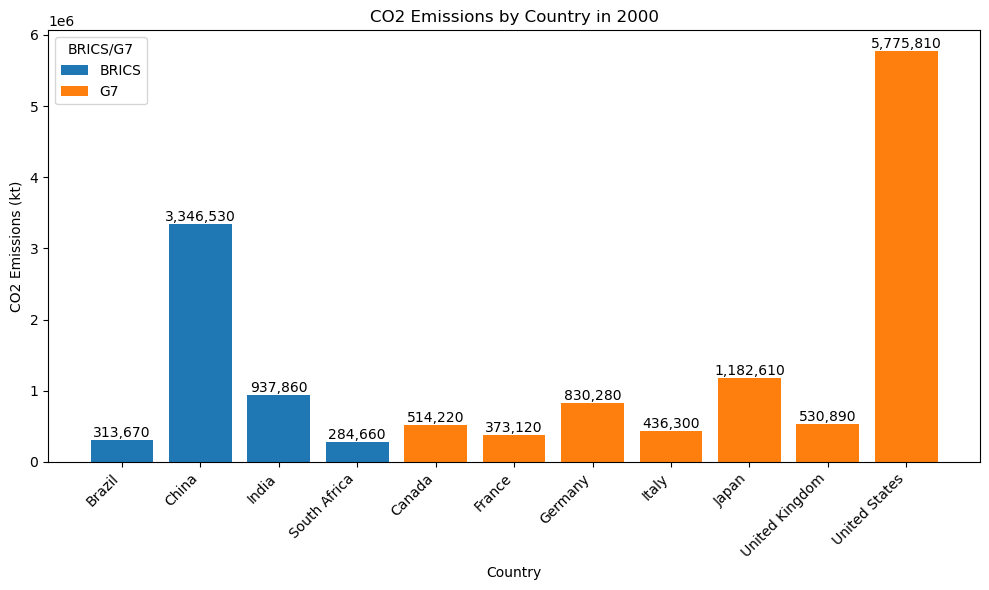

In [13]:
# Filter data for the year 2000
data_2000 = BRICS_G7_df[BRICS_G7_df["Year"] == 2000]

# Plot
plt.figure(figsize=(10, 6))

# Group data by BRICS/G7 and plot bars
for group, df_group in data_2000.groupby("BRICS/G7"):
    bars = plt.bar(df_group["Entity"], df_group["Value_co2_emissions_kt_by_country"], label=group)
    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Customize plot
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (kt)")
plt.title("CO2 Emissions by Country in 2000")
plt.xticks(rotation=45, ha='right')
plt.legend(title="BRICS/G7")
# Specify y-axis format


# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# In the year 2000, the US was by far the largest generator of CO2 emissions among the G7 and BRICS countries, and consequently, in the world.
# Within the BRICS countries, China was the largest emitter of this gas, followed by India, though not very closely.



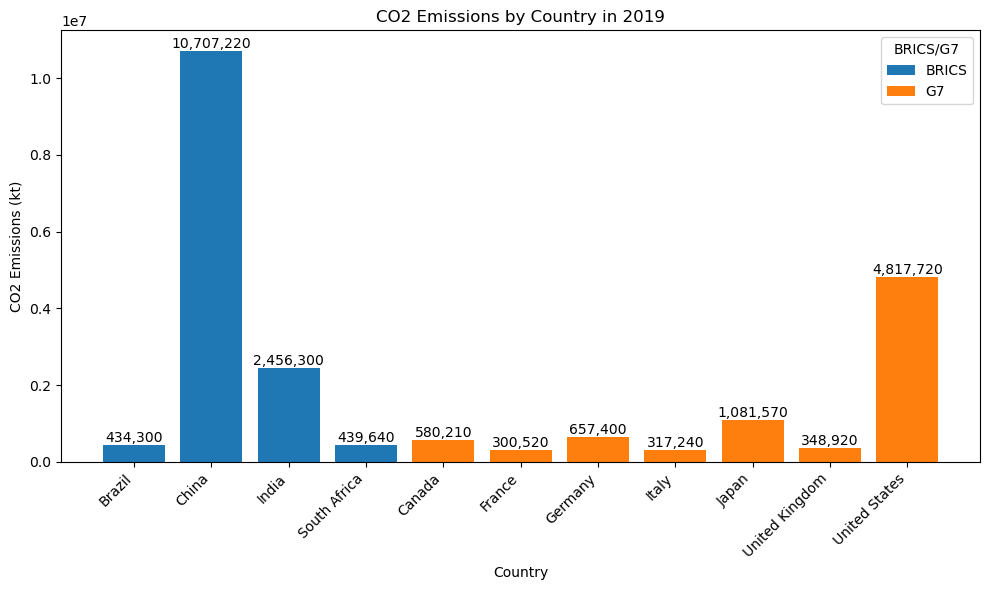

In [14]:
# Filter data for the year 2019
data_2019 = BRICS_G7_df[BRICS_G7_df["Year"] == 2019]

# Plot
plt.figure(figsize=(10, 6))

# Group data by BRICS/G7 and plot bars
for group, df_group in data_2019.groupby("BRICS/G7"):
    bars = plt.bar(df_group["Entity"], df_group["Value_co2_emissions_kt_by_country"], label=group)
    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Customize plot
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (kt)")
plt.title("CO2 Emissions by Country in 2019")
plt.xticks(rotation=45, ha='right')
plt.legend(title="BRICS/G7")
# Specify y-axis format


# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# In the year 2019, we can observe that the US has reasonably reduced its CO2 emissions.
# However, China's emissions have nearly tripled compared to those in 2000; India has doubled its emissions since 2000.

# Speculation as to why this might be the case
# We can reasonably conclude that the US has contained its emissions due to its economy continuing to transition from a manufacturing-based to a service-based economy.
# In contrast, China and India have rapidly expanded their manufacturing output, which accounts for their significant increase in emissions.



In [66]:
# Assuming BRICS_G7_df is your original DataFrame
new_df = BRICS_G7_df[['Entity', 'Value_co2_emissions_kt_by_country', 'Year']]



In [68]:
print(new_df.columns)


Index(['Entity', 'Value_co2_emissions_kt_by_country', 'Year'], dtype='object')


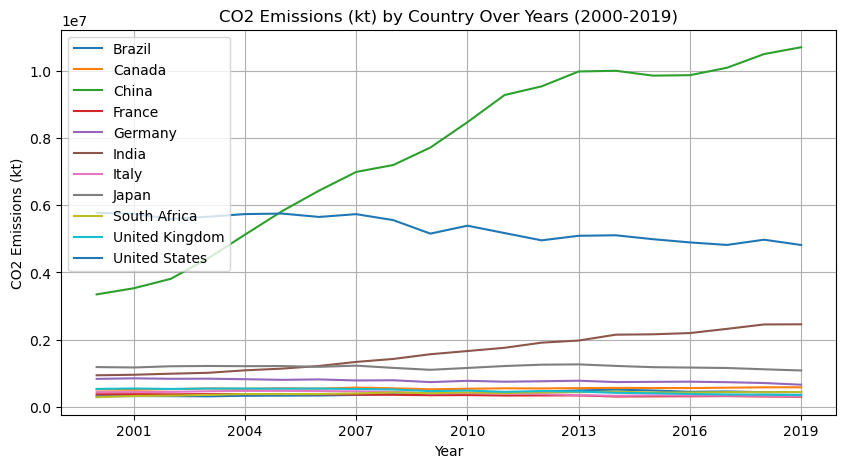

In [59]:

# Your existing code to plot the data
# ...

# Filter DataFrame to include only data from 2000 to 2019
pivoted_df_subset = pivoted_df.loc['2000':'2019']

# Assuming 'pivoted_df' is the DataFrame with years as the index
# Get unique years from the index, convert to integer
years = pivoted_df_subset.index.astype(int).unique()

plt.figure(figsize=(10, 5))
plt.plot(pivoted_df_subset)
plt.title('CO2 Emissions (kt) by Country Over Years (2000-2019)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')

# Set x-axis major ticks to the unique years
plt.xticks(years, years)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.legend(pivoted_df_subset.columns, loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# This graph further demonstrates the analysis conducted in the last two graphs, with the added visualization of the year-by-year growth and/or reduction in CO2 emissions.


In [42]:
!pip install pmdarima
import pmdarima as pm



  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 991.0 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/614.7 kB 2.4 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 2.9 MB/s eta 0:00:01
   --------------------------- ------------ 419.8/614.7 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- -----------

In [69]:

# Assuming 'new_df' has 'Year' as datetime and is set as the index
new_df['Year'] = pd.to_datetime(new_df['Year'], format='%Y')
new_df.set_index('Year', inplace=True)

# Sort DataFrame by the 'Year' index
new_df.sort_index(inplace=True)

# Filter data to include only the years 2000-2019
filtered_df = new_df.loc['2000':'2019']

# Get all unique entities
entities = filtered_df['Entity'].unique()

# Prepare a dictionary to collect forecasts
forecasts = {}

# Loop through each entity to forecast emissions
for entity in entities:
    print(f"Forecasting for {entity}...")
    time_series = filtered_df[filtered_df['Entity'] == entity]['Value_co2_emissions_kt_by_country']

    if time_series.empty:
        print(f"No data found for {entity}. Skipping...")
        continue

    # Fit the ARIMA model
    model = pm.auto_arima(time_series, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)

    # Forecast for the next 11 years (2020-2030)
    forecast = model.predict(n_periods=11)

    # Store the forecast in the dictionary
    forecasts[entity] = forecast

# Now, combine all forecasts into a single DataFrame
forecast_dfs = []
for entity, forecast in forecasts.items():
    forecast_years = pd.date_range(start=pd.Timestamp('2020-01-01'), periods=11, freq='Y')
    forecast_df = pd.DataFrame({
        'Entity': entity,
        'Year': forecast_years.year,
        'Forecasted_co2_emissions_kt': forecast
    })
    forecast_dfs.append(forecast_df)

# Concatenate all forecast DataFrames
all_forecasts_df = pd.concat(forecast_dfs)

print(all_forecasts_df)


C:\Users\52614\AppData\Local\Temp\ipykernel_3336\2308111581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = pd.to_datetime(new_df['Year'], format='%Y')
C:\Users\52614\AppData\Local\Temp\ipykernel_3336\2308111581.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.sort_index(inplace=True)


Forecasting for Brazil...
Forecasting for Canada...
Forecasting for United States...
Forecasting for China...
Forecasting for United Kingdom...
Forecasting for India...
Forecasting for Italy...
Forecasting for Japan...
Forecasting for South Africa...
Forecasting for Germany...
Forecasting for France...
            Entity  Year  Forecasted_co2_emissions_kt
2020-01-01  Brazil  2020                434299.987800
2021-01-01  Brazil  2021                434299.987800
2022-01-01  Brazil  2022                434299.987800
2023-01-01  Brazil  2023                434299.987800
2024-01-01  Brazil  2024                434299.987800
...            ...   ...                          ...
2026-01-01  France  2026                273772.616526
2027-01-01  France  2027                269951.563316
2028-01-01  France  2028                266130.510105
2029-01-01  France  2029                262309.456895
2030-01-01  France  2030                258488.403684

[121 rows x 3 columns]


In [58]:
all_forecasts_df.to_csv('forecasted_co2_emissions.csv', index=False)

In [57]:
#Introduction

#The forecast of the years 2020 - 2030 was done using an ARIMA model-


#ARIMA (AutoRegressive Integrated Moving Average) is a widely used time series forecasting method that is particularly suitable for data with temporal dependencies and trends. 

#ARIMA models capture how CO2 emissions at one time point are influenced by past emissions, making them ideal for predicting future emissions based on historical data.

#They can handle trends and seasonal patterns in CO2 data by adjusting for these factors, allowing for accurate forecasting even when the data exhibits periodic fluctuations.

# ARIMA models are versatile and can adapt to different patterns in the data, making them suitable for various types of CO2 emissions data and allowing for effective modeling of emission dynamics.

#Once trained on historical data, ARIMA models can provide forecasts of future CO2 emissions, helping policymakers and researchers anticipate trends and plan mitigation strategies.









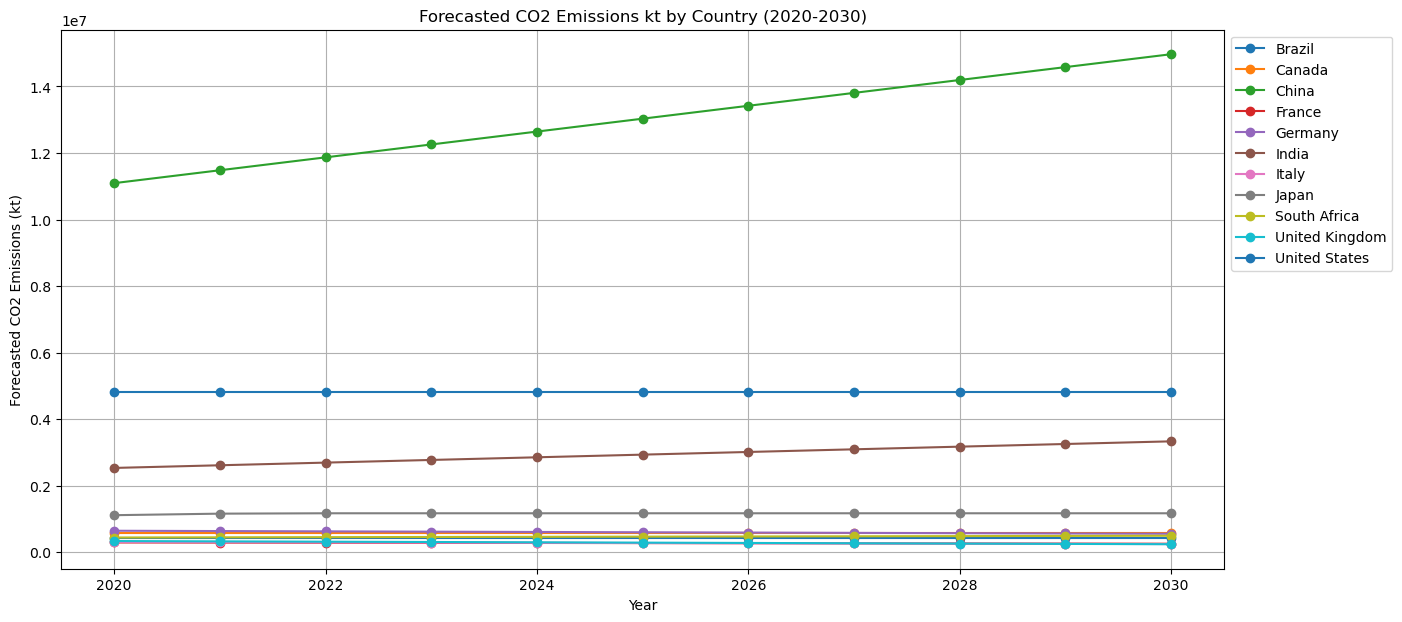

In [70]:
# Ensure that 'Year' is an integer for plotting
all_forecasts_df['Year'] = all_forecasts_df['Year'].astype(int)

# Pivot the DataFrame to have 'Year' as the index and each 'Entity' as a column
pivot_df = all_forecasts_df.pivot(index='Year', columns='Entity', values='Forecasted_co2_emissions_kt')

# Plot using Matplotlib
plt.figure(figsize=(15, 7))
for entity in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[entity], marker='o', label=entity)

plt.title('Forecasted CO2 Emissions kt by Country (2020-2030)')
plt.xlabel('Year')
plt.ylabel('Forecasted CO2 Emissions (kt)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [ ]:
# Conclusion

# We anticipate that in the upcoming years (up to 2030), China and India will continue to increase their CO2 emissions, with China being the most significant emitter and experiencing the steepest growth.
# The US is expected to maintain roughly the same level of emissions as it reached in 2020.

# However, this forecast does not take into account potential innovations in renewable and nuclear energy, which could render these predictions inaccurate.





In [73]:
# Combine the original DataFrame and the forecasted DataFrame
Co2_2000_2030_df = pd.concat([new_df, all_forecasts_df], ignore_index=True)

# Display the resulting DataFrame
print(Co2_2000_2030_df)



             Entity  Value_co2_emissions_kt_by_country    Year  \
0            Brazil                           313670.0     NaN   
1            Canada                           514220.0     NaN   
2     United States                          5775810.0     NaN   
3             China                          3346530.0     NaN   
4    United Kingdom                           530890.0     NaN   
..              ...                                ...     ...   
347          France                                NaN  2026.0   
348          France                                NaN  2027.0   
349          France                                NaN  2028.0   
350          France                                NaN  2029.0   
351          France                                NaN  2030.0   

     Forecasted_co2_emissions_kt  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN

In [84]:

# Introduction
# In the following charts, we will explore the relationship between:
# - Electricity generated from renewable sources (measured in terawatt-hours, TWh)
# - CO2 emissions by country (measured in kilotonnes, kt)

# This analysis aims to determine if investments in renewable energy production are associated with lower CO2 emissions.


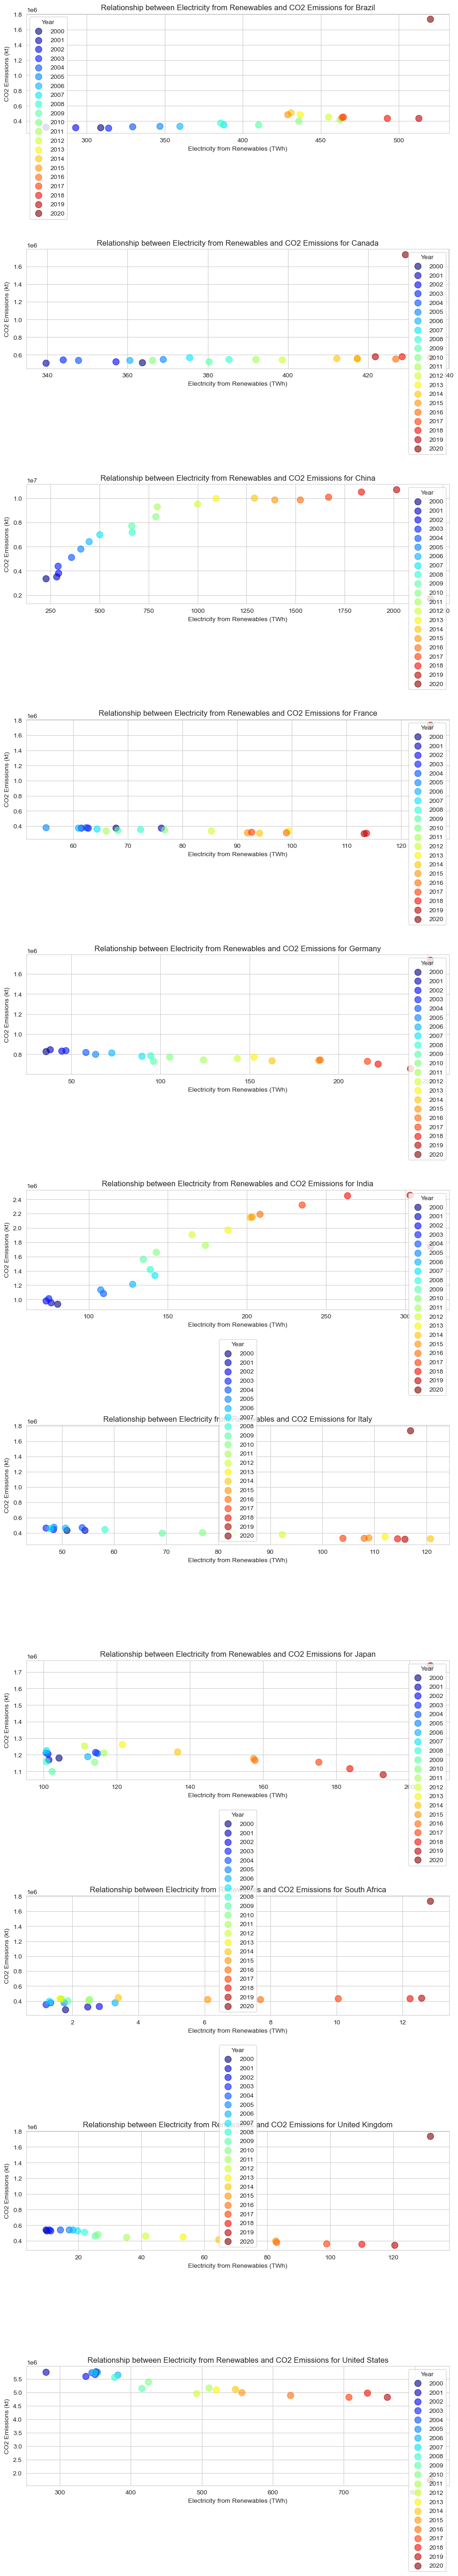

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming BRICS_G7_df is already loaded with the relevant data

# Create a unique color for each year
years = BRICS_G7_df['Year'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(years)))

# Map each year to a color
year_to_color = dict(zip(years, colors))

# Group the data by 'Entity'
entities = BRICS_G7_df.groupby('Entity')

# Create a figure for the scatter plots
fig, axs = plt.subplots(nrows=len(entities), figsize=(10, 5 * len(entities)))

# In case there is only one entity, axs may not be an array, so we wrap it
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

for ax, (entity, group) in zip(axs, entities):
    # Scatter plot for each year
    for year in years:
        annual_data = group[group['Year'] == year]
        ax.scatter(annual_data['Electricity from renewables (TWh)'], 
                   annual_data['Value_co2_emissions_kt_by_country'], 
                   color=year_to_color[year], 
                   label=year, 
                   s=100, # Size of each point
                   alpha=0.6) # Transparency of the points

    # Add titles and labels
    ax.set_title(f'Relationship between Electricity from Renewables and CO2 Emissions for {entity}')
    ax.set_xlabel('Electricity from Renewables (TWh)')
    ax.set_ylabel('CO2 Emissions (kt)')
    ax.legend(title='Year')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
# Conclusion

# The most significant conclusions can be drawn by analyzing the following countries:
# USA, China, India.

# As previously noted, these countries are among the largest CO2 contributors.

# Despite increases in renewable energy production, China and India have seen growth in CO2 emissions. This indicates that their efforts have not been substantial enough to meet their Paris Agreement goals or to significantly curb emissions.

# In contrast, the USA and Japan have made improvements in reducing their emissions. It can be somewhat concluded that renewable energy production has been a significant factor, as evidenced by the downward trends shown in their charts.


In [ ]:
# Introduction

# GDP per capita is a good indicator of a country's economic development.
# It can be assumed that as the energy output of a country increases, its GDP per capita should, in theory, increase as well.

# The relationship between these two variables is clearly affected by numerous factors. We seek to evaluate this relationship to establish relevant conclusions.



C:\Users\52614\AppData\Local\Temp\ipykernel_3336\837315.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BRICS_G7_df['Entity Abbr'] = BRICS_G7_df['Entity'].apply(lambda x: x[:3].upper())


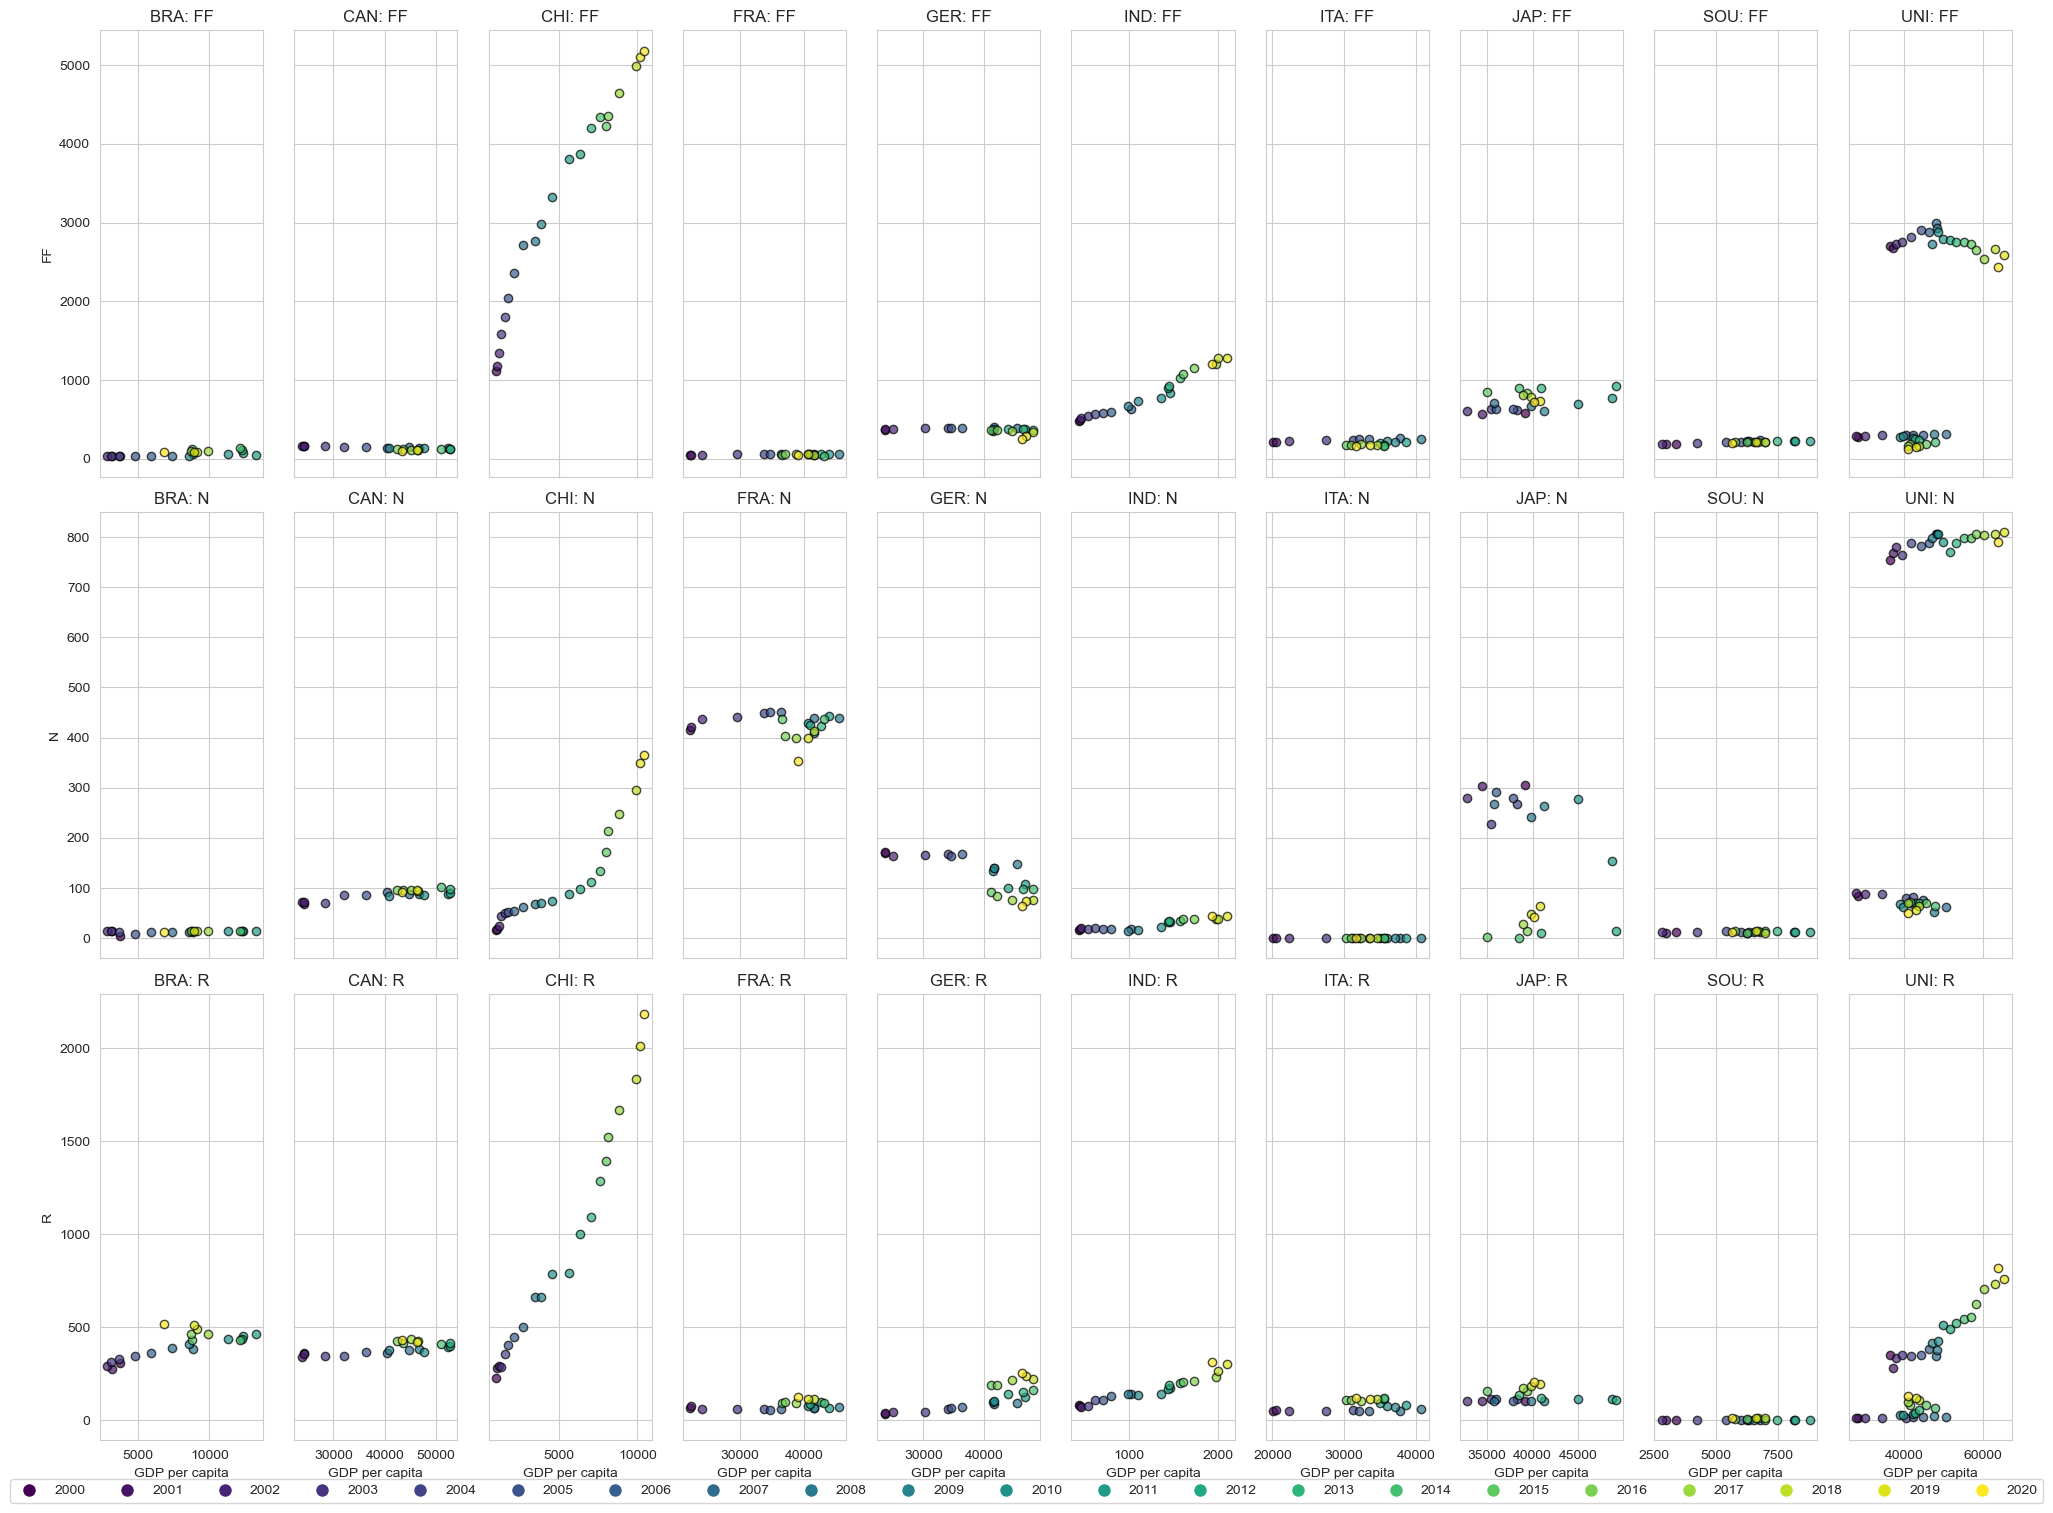

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming the DataFrame BRICS_G7_df is already loaded

# Define the energy sources columns to plot with abbreviations
energy_sources_abbr = {
    'Electricity from fossil fuels (TWh)': 'FF',
    'Electricity from nuclear (TWh)': 'N',
    'Electricity from renewables (TWh)': 'R'
}

# Create a color palette with enough colors
colors = plt.cm.viridis(np.linspace(0, 1, len(BRICS_G7_df['Year'].unique())))

# Create abbreviations for the Entity names
BRICS_G7_df['Entity Abbr'] = BRICS_G7_df['Entity'].apply(lambda x: x[:3].upper())

# Start plotting
# Use the unique abbreviation for subplot columns
unique_entities = BRICS_G7_df['Entity Abbr'].unique()
fig, axs = plt.subplots(len(energy_sources_abbr), len(unique_entities), figsize=(20, 15), sharex='col', sharey='row')

# If there's only one entity, we need to wrap axs to prevent indexing errors
if len(unique_entities) == 1:
    axs = np.array([axs]).T

for row, (energy_source, energy_abbr) in enumerate(energy_sources_abbr.items()):
    for col, entity_abbr in enumerate(unique_entities):
        entity_group = BRICS_G7_df[BRICS_G7_df['Entity Abbr'] == entity_abbr]
        for year, year_group in entity_group.groupby('Year'):
            color = colors[year - entity_group['Year'].min()]  # get unique color for each year
            axs[row, col].scatter(year_group['gdp_per_capita'], year_group[energy_source],
                                  color=color, label=year, alpha=0.7, edgecolor='k')

        axs[row, col].set_title(f"{entity_abbr}: {energy_abbr}")
        if col == 0:
            axs[row, col].set_ylabel(energy_abbr)
        if row == len(energy_sources_abbr) - 1:
            axs[row, col].set_xlabel('GDP per capita')

# Handling legend for years
# Create custom legend for the years
handles, labels = [], []
for year, color in zip(BRICS_G7_df['Year'].unique(), colors):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10))
    labels.append(year)
    
# Place the legend outside of the last axes
fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.tight_layout()
plt.show()



In [ ]:
# Conclusions
# Ideally, we would like to see a direct or even exponential relationship between energy output (particularly renewable and nuclear) and GDP per capita. However, as we can see in all the plotted graphs, this is only the case in a few of them.

# China displays the most defined direct relationship between these two variables and also the steepest relationship concerning fossil fuels and GDP per capita.
# A steep relationship indicates a greater energy output per unit of GDP per capita growth.

# The US also exhibits a direct relationship, though it is less pronounced than in China. Additionally, we observe a direct negative relationship between GDP per capita and fossil fuel output, which is a favorable condition.


In [75]:
all_forecasts_df

,Entity,Year,Forecasted_co2_emissions_kt
2020-01-01,Brazil,2020,434299.987800
2021-01-01,Brazil,2021,434299.987800
2022-01-01,Brazil,2022,434299.987800
2023-01-01,Brazil,2023,434299.987800
2024-01-01,Brazil,2024,434299.987800
...,...,...,...
2026-01-01,France,2026,273772.616526
2027-01-01,France,2027,269951.563316
2028-01-01,France,2028,266130.510105
2029-01-01,France,2029,262309.456895


In [76]:
new_df

,Entity,Value_co2_emissions_kt_by_country
Year,,
2000-01-01,Brazil,3.136700e+05
2000-01-01,Canada,5.142200e+05
2000-01-01,United States,5.775810e+06
2000-01-01,China,3.346530e+06
2000-01-01,United Kingdom,5.308900e+05
...,...,...
2020-01-01,China,1.737423e+06
2020-01-01,France,1.737423e+06
2020-01-01,Italy,1.737423e+06
